In [4]:
from preamble import *
%matplotlib inline
import pandas as pd

# Performance Evaluation

## Holdout method 

The holdout method is the simplest way of validating a model by splitting a dataset into train and test datasets. 

In the previous session, the dataset was already split into train and test data. Today, we create our own train and test datasets using the `train_test_split` method in scikit learn. And for this we have to load the entire dataset as shown below:


### Model Complexity vs Generalisation

**Model Complexity** in the case of KNN is controlled using the $k$ parameter. Greater the value of $k$, smoother is the decision boundary between the classes.

Smoother boundary => Simpler model

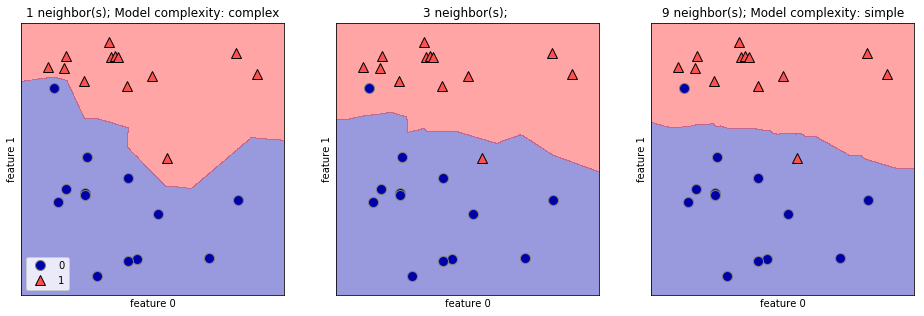

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
from sklearn.neighbors import KNeighborsClassifier

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
model_complexities = ['Model complexity: complex', '', 'Model complexity: simple']
for n_neighbors, ax, complexity in zip([1, 3, 9], axes, model_complexities):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s); {complexity}")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

**Generalization** refers to your model's ability to adapt effectively to new, previously unseen data, drawn from the same distribution as the one used to create the model.

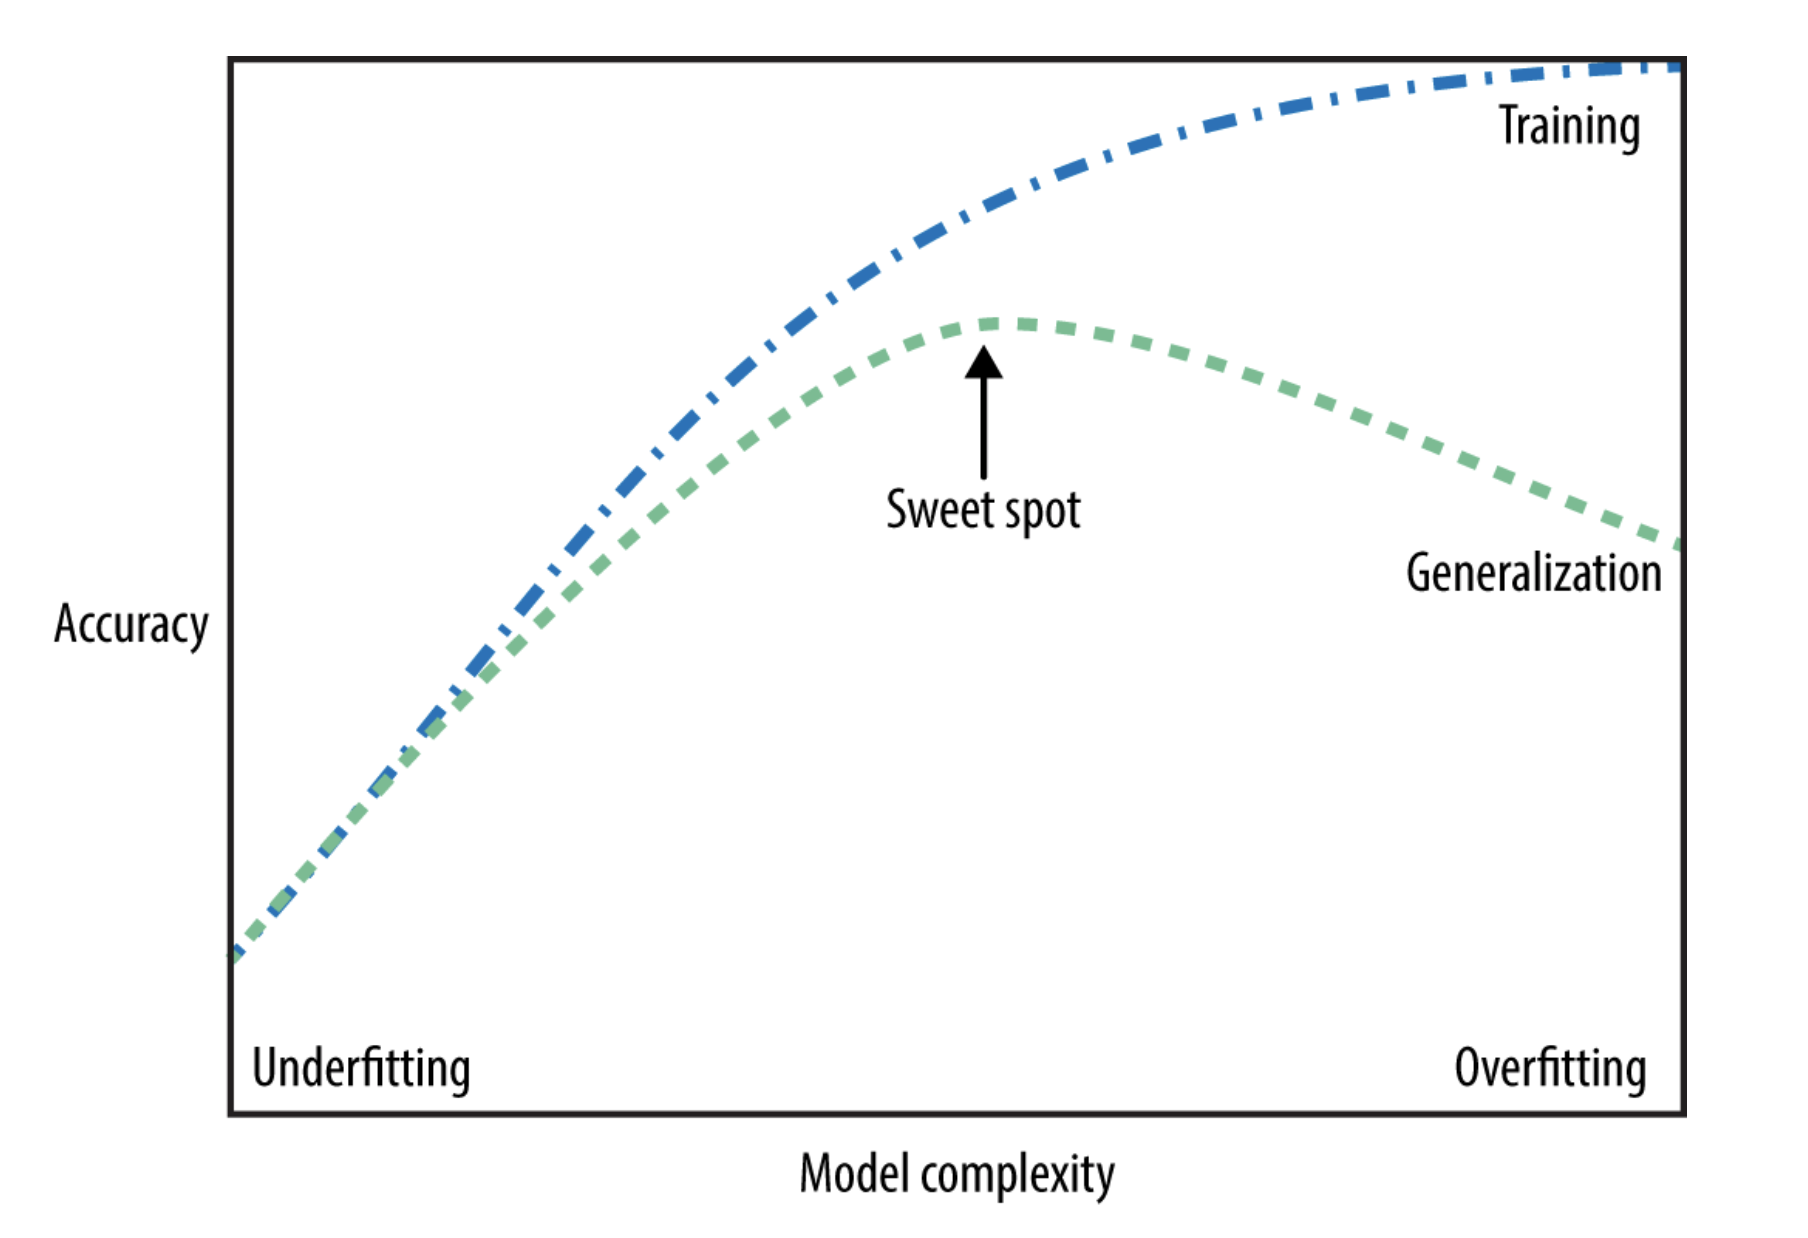

In [6]:
def train_test_accuracies(neighbors_settings):
    training_accuracy = []
    test_accuracy = []
    for n_neighbors in neighbors_settings:
        # build the model
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(train_x, train_y)
        # record training set accuracy
        training_accuracy.append(clf.score(train_x, train_y))
        # record generalization accuracy
        test_accuracy.append(clf.score(test_x, test_y))
    return training_accuracy, test_accuracy

In [7]:
def plot_knn_train_test_accuracy(neighbors_settings, training_accuracy, test_accuracy):
    f, ax = plt.subplots(figsize=(9,7))
    ax.plot(neighbors_settings, training_accuracy, label="training accuracy")
    ax.plot(neighbors_settings, test_accuracy, label="test accuracy")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of neighbours (k)")
    ax.legend()
    plt.show()

In [8]:
train_df = pd.read_csv('data/breast_cancer_wisconsin/train.csv', index_col=0)
train_y = train_df.pop('Malignant')
train_x = train_df

test_df = pd.read_csv('data/breast_cancer_wisconsin/test.csv', index_col=0)
test_y = test_df.pop('Malignant')
test_x = test_df

In [9]:
neighbors_settings = range(1, 11)
training_accuracy, test_accuracy = train_test_accuracies(neighbors_settings)

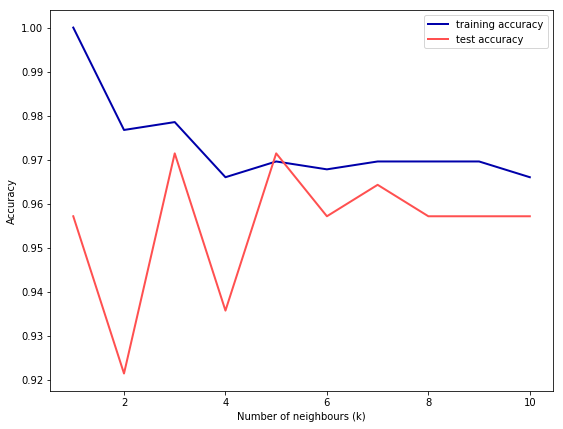

In [10]:
plot_knn_train_test_accuracy(neighbors_settings, training_accuracy, test_accuracy)

> What are your insights from the above plot?

### Advantages and disadvantages of Holdout method

- Advantage
  - Simplicity
  
- Disadvantages
  - Depends heavily on which data points end up in the training set and which end up in the test set
  - Ratio of split into training and test data

### Creating train and test datasets

In [11]:
cancer_df = pd.read_csv('data/breast_cancer_wisconsin/full.csv', index_col=0)
print(cancer_df.shape)

cancer_target = cancer_df.pop('Malignant')
cancer_data = cancer_df

(699, 10)


Here's how we create new train and test sets where test set size is 25% (default) of the total size.

In [12]:
train_x, test_x, train_y, test_y = train_test_split(cancer_data, cancer_target, test_size=0.25, stratify=cancer_target, random_state=42)

The train_test_split has the following options:
- test_size
- train_size
- random_state
- shuffle
- stratify

**Shuffle** ensures that when the file is ordered by classes and the selection is not stratified, then the train and test sets are not biased in any fashion

**Stratification** is the process of dividing members of the population into homogeneous subgroups before sampling

In [13]:
def print_dataset_sizes(train_x, test_x, train_y, test_y):
    print(f"Training data shape: {train_x.shape}\nTraining target shape {train_y.shape}")
    print(f"Test data shape: {test_x.shape}\nTest target shape {test_y.shape}")

In [14]:
print_dataset_sizes(train_x, test_x, train_y, test_y)

Training data shape: (524, 9)
Training target shape (524,)
Test data shape: (175, 9)
Test target shape (175,)


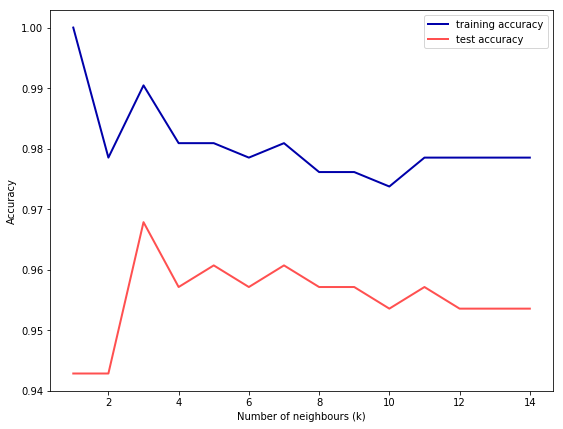

In [17]:
neighbors_settings = range(1, 11)
training_accuracy, test_accuracy = train_test_accuracies(neighbors_settings)
plot_knn_train_test_accuracy(neighbors_settings, training_accuracy, test_accuracy)

> Create test set with 50% of the data and train set as the remaining 50% and view the model complexity vs accuracy graph

> Create test set with 75% of the data and train set with the remaining 25% and view the model complexity vs accuracy graph. What do you observe? Please note this is definitely not the recommended split ratio. This is only to illustrate the effects of reducing training data

## Cross validation

**Cross-validation** is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross-validation, the data is instead split repeatedly and multiple models are trained. 

The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. 

Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. That is, the model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. 

Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. 

For each of these five splits of the data into training and test sets, we compute the accuracy. In the end, we have collected five accuracy values. 

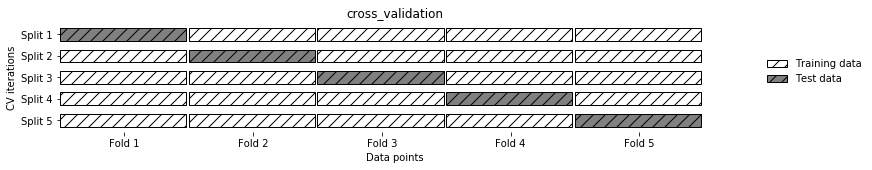

In [23]:
mglearn.plots.plot_cross_validation()

Load data again

In [24]:
cancer_df = pd.read_csv('data/breast_cancer_wisconsin/full.csv', index_col=0)
cancer_target = cancer_df.pop('Malignant')
cancer_data = cancer_df

In [26]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, cancer_data, cancer_target)
scores

/Users/sumukh/Envs/ml_bootcamp/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.944, 0.957, 0.987])

The mean score of the folds is usually reported as the score for the dataset and classifier settings

In [29]:
scores.mean()

0.9628649850086878

> The `cv` parameter controls the number of folds. Validate the mean score of 10 fold cross validation

### Stratified cross validation

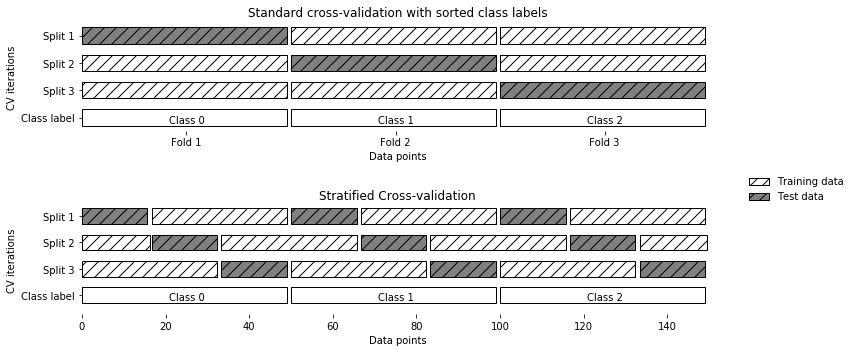

In [28]:
mglearn.plots.plot_stratified_cross_validation()

In [32]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(clf, cancer_data, cancer_target, cv=kfold)
scores

array([0.986, 0.971, 0.957, 0.979, 0.942])

In [33]:
scores.mean()

0.9670606372045223

### Advantages and Disavantages of Cross Validation

- Advantages
  - Less likelihood of getting a biased test/training dataset
  - Provides some idea of sensitivity of the model
  - Uses more data for training
  
- Disadvantage
  - Computation cost 

# Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. The outputs of a decision tree for easy to understand for humans.

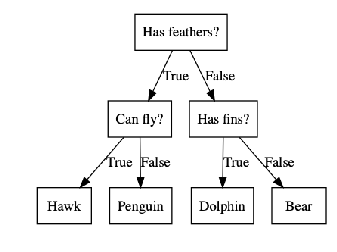

In [35]:
mglearn.plots.plot_animal_tree()

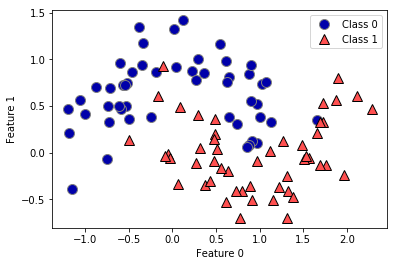

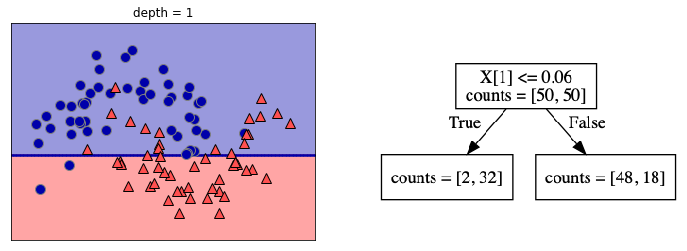

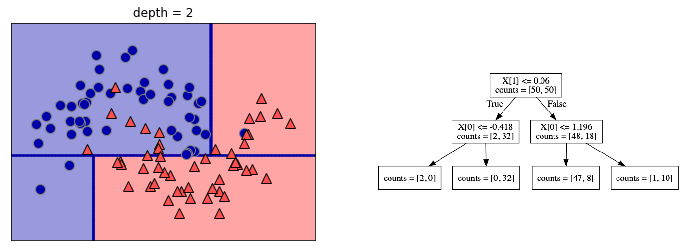

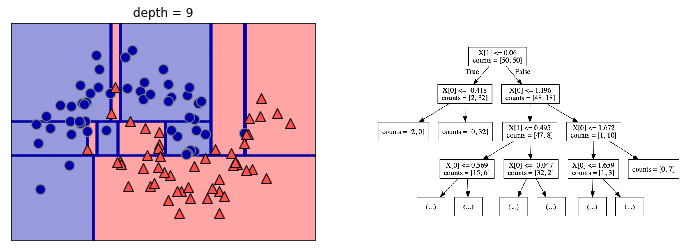

In [36]:
mglearn.plots.plot_tree_progressive()

## Two main parts of the tree building process

### Splitting 

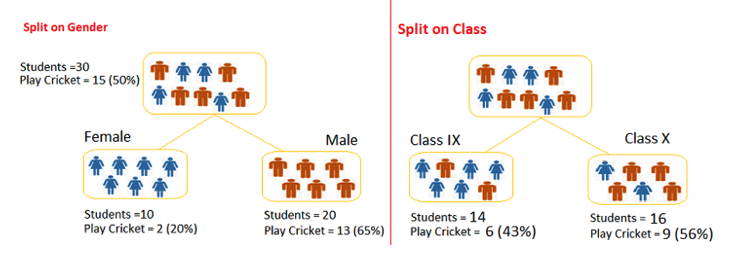

### Pruning

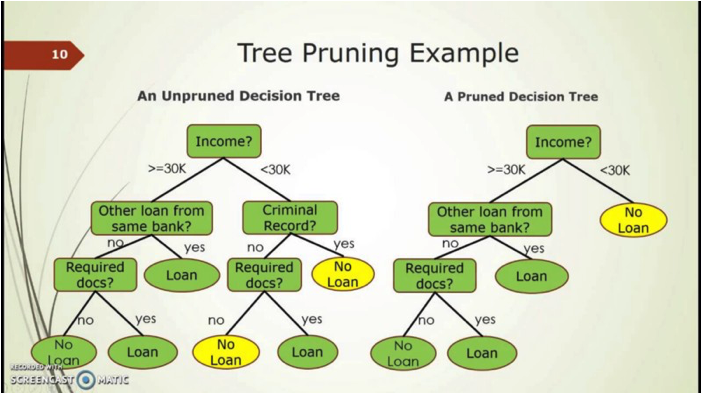

## How does it choose the attribute to split at each level?

### Entropy

Entropy in physics is defined as the thermodynamic quantity representing the unavailability of a system's thermal energy for conversion into mechanical work, often interpreted as the degree of disorder or randomness in the system.

### Information Gain

The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

train_x, test_x, train_y, test_y = train_test_split(cancer_data, cancer_target, test_size=0.25, stratify=cancer_target, random_state=42)
tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
tree.score(test_x, test_y)

0.9371428571428572